In [1]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=44652ee8b12a7b9504e9040d34467930cb0733620a1b0148916c851ae09fedb0
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


In [2]:
!pip install unrar
!unrar x "/content/recordings.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/recordings.rar

Creating    recordings                                                OK
Creating    recordings/1                                              OK
Extracting  recordings/1/column1.txt                                       0%  OK 
Extracting  recordings/1/column2.txt                                       0%  OK 
Extracting  recordings/1/column3.txt                                       0%  OK 
Extracting  recordings/1/metadata.txt                                      1%  OK 
Creating    recordings/10                                             OK
Extracting  recordings/10/column1.txt                                      1%  OK 
Extracting  recordings/10/column2.txt                                      1%  OK 
Extracting  recordings/10/column3.txt                                      1%  OK 
Extracting  recordin

In [54]:
import os
from datetime import datetime
import numpy as np
import numpy as np
import pandas as pd
from scipy import stats
from scipy.fft import fft
from scipy.signal import find_peaks
from itertools import groupby
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
class Patient:
    def __init__(self, id, name, surname, test_date, breath_sensor, audio_sensor, is_smoking, age, is_sick):
        self.id = id  # Hasta numarası
        self.name = name  # Hastanın adı
        self.surname = surname  # Hastanın soyadı
        self.test_date = test_date  # Test tarihi (datetime objesi)
        self.breath_sensor = breath_sensor  # column1.txt verisi: integer listesi
        self.audio_sensor = audio_sensor  # column3.txt verisi: double dizisi (list of floats)
        self.is_smoking = is_smoking  # Hasta sigara içme durumu
        self.age = age
        self.is_sick = is_sick

    #def __repr__(self):
      #return (f"Id={self.id},Name={self.name}, Surname={self.surname}, Test_Date={self.test_date}, "
                #f"breath_sensor={self.breath_sensor}, audio_sensor={self.audio_sensor}, is_patient={self.is_sick}")

    def __repr__(self):
       return (f"Id={self.id} "
                f"audio_sensor={self.audio_sensor}, is_smoking= {self.is_smoking}, is_age = {self.age}, is_patient={self.is_sick}")

In [25]:
# 'recordings_filtered' klasörünün yolu
base_dir = '/content/recordings'

# Hasta nesnelerini saklamak için bir liste
patient_list = []

# 1'den 50'ye kadar olan klasörlerde döngü
for i in range(1, 100):
    folder_path = os.path.join(base_dir, str(i))  # Her bir klasörün yolu

    # column1.txt, column3.txt ve hasta bilgilerini içeren dosya yolları
    column1_path = os.path.join(folder_path, 'column1.txt')
    column3_path = os.path.join(folder_path, 'column3.txt')

    # Hasta bilgilerini içeren metadata.txt dosyasının yolu
    metadata_path = os.path.join(folder_path, 'metadata.txt')

    try:
        with open(column1_path, 'r') as file1, open(column3_path, 'r') as file3, open(metadata_path, 'r') as meta_file:

            id = i

            # column1.txt içeriğini integer listesine çevir
            breath_sensor_raw = list(map(float, file1.read().strip()[1:-1].split('\n')))
            breath_sensor = breath_sensor_raw[1:-1]

            # column3.txt içeriğini bir double dizisine çevir
            audio_sensor = list(map(float, file3.read().strip().split()))

            # metadata.txt dosyasından hasta bilgilerini al (ad, soyad, test tarihi)
            metadata_lines = meta_file.read().strip().split('\n')

            # Patient Name: John Doe satırından adı al
            name_surname = metadata_lines[0].replace("Patient Name: ", "")
            name, surname = name_surname.split(" ", 1)  # Ad ve soyadı ayır

            # Date: 2025-03-22_16-43-37 satırından test tarihini al
            test_date_str = metadata_lines[1].replace("Date: ", "")
            # Test tarihini datetime objesine dönüştür (Date: 2025-03-22_16-43-37 formatı)
            test_date = datetime.strptime(test_date_str, '%Y-%m-%d_%H-%M-%S')

            is_sick = metadata_lines[2].replace("is_sick: ", "")

            is_smoking = metadata_lines[3].replace("smoking: ", "")

            age = metadata_lines[4].replace("age: ", "")

            # Yeni Hasta nesnesini oluştur
            patient = Patient(id, name, surname, test_date, breath_sensor, audio_sensor, is_smoking, age, is_sick)

            # Hasta nesnesini listeye ekle
            patient_list.append(patient)
    except FileNotFoundError:
        print(f"Dosya bulunamadı: {folder_path}")
        continue

# Listeyi görüntüle (isteğe bağlı)
for patient in patient_list:
    print(patient)

Id=1 audio_sensor=[10.8, 11.0, 10.8, 10.6, 10.6, 10.4, 10.4, 10.4, 10.8, 10.8, 174.2, 582.4, 1072.6, 1317.4, 1725.6, 2052.2, 2052.2, 2133.8, 2378.8, 2460.6, 2215.8, 2052.6, 1644.2, 1154.0, 664.0, 500.6, 584.0, 910.8, 1401.0, 2136.0, 2789.4, 3196.0, 3359.4, 3522.8, 3359.4, 3114.2, 2705.8, 2624.0, 2379.0, 2052.6, 1562.8, 1236.0, 664.4, 255.8, 255.4, 500.2, 908.6, 1235.0, 1888.6, 2052.2, 2297.4, 2379.2, 2542.8, 2461.2, 2542.8, 2542.8, 2461.0, 2461.0, 2134.0, 2215.6, 2052.0, 1725.2, 1235.0, 1071.8, 826.6, 1071.8, 1398.6, 2052.2, 2379.0, 2624.2, 2461.0, 2542.6, 2461.0, 2624.2, 2542.4, 2624.0, 2544.8, 1973.0, 1401.4, 911.4, 584.6, 337.4, 582.6, 1072.8, 1399.6, 1889.8, 1889.4, 2052.4, 1970.4, 2052.2, 1888.8, 2215.6, 2052.2, 2008.0, 1926.2, 2089.6, 1681.4, 1436.6, 1072.4, 745.6, 337.2, 582.2, 1072.0, 1480.6, 1807.4, 1970.8, 2297.6, 2134.6, 2134.6, 2379.6, 2461.2, 2298.0, 2543.0, 2624.6, 2053.0, 1563.4, 1073.0, 501.2, 92.6, 256.4, 827.8, 1399.6, 2052.8, 2461.4, 3032.6, 3114.2, 3114.2, 2869.4, 2

In [26]:
sample_healthy_patients = [patient_list[9], patient_list[25], patient_list[30]]

In [27]:
sample_sick_patients = [patient_list[37], patient_list[45], patient_list[48]]

In [28]:
def plot_time_series_for_patients(patients, is_breath=True, sample_period=1):
    num_patients = len(patients)  # Hasta sayısı

    fig, axes = plt.subplots(nrows=num_patients, ncols=1, figsize=(8, 4 * num_patients))
    # Hasta sayısına göre alt grafikler oluştur

    if num_patients == 1:
        axes = [axes]  # Tek hasta varsa liste haline getir

    for i, patient in enumerate(patients):
        if is_breath:
          y_values = patient.breath_sensor  # Nefes sensörü değerleri
        else:
          y_values = patient.audio_sensor
        x_values = np.arange(0, len(y_values) * sample_period, sample_period)  # Eşit aralıklı zaman noktaları

        axes[i].plot(x_values, y_values, marker='o', linestyle='-', color="skyblue", label=f"Hasta {patient.id}")
        axes[i].set_xlabel("Zaman (Örnekleme Periyodu)")
        if is_breath:
          axes[i].set_ylabel("Nefes Sensörü Değeri")
        else:
          axes[i].set_ylabel("Ses Sensörü Değeri")
        if is_breath:
          axes[i].set_title(f"Hasta {patient.id} Nefes Sensörü Zaman Serisi")
        else:
          axes[i].set_title(f"Hasta {patient.id} Ses Sensörü Zaman Serisi")

        axes[i].grid(True)
        axes[i].legend()

    main_title = "KOAH Hastalarının Nefes Sensörü Zaman Serisi" if is_sick else "Sağlıklı Kişilerin Nefes Sensörü Zaman Serisi"
    fig.suptitle(main_title, fontsize=14, fontweight="bold")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Başlık sıkışmasını önle
    plt.show()

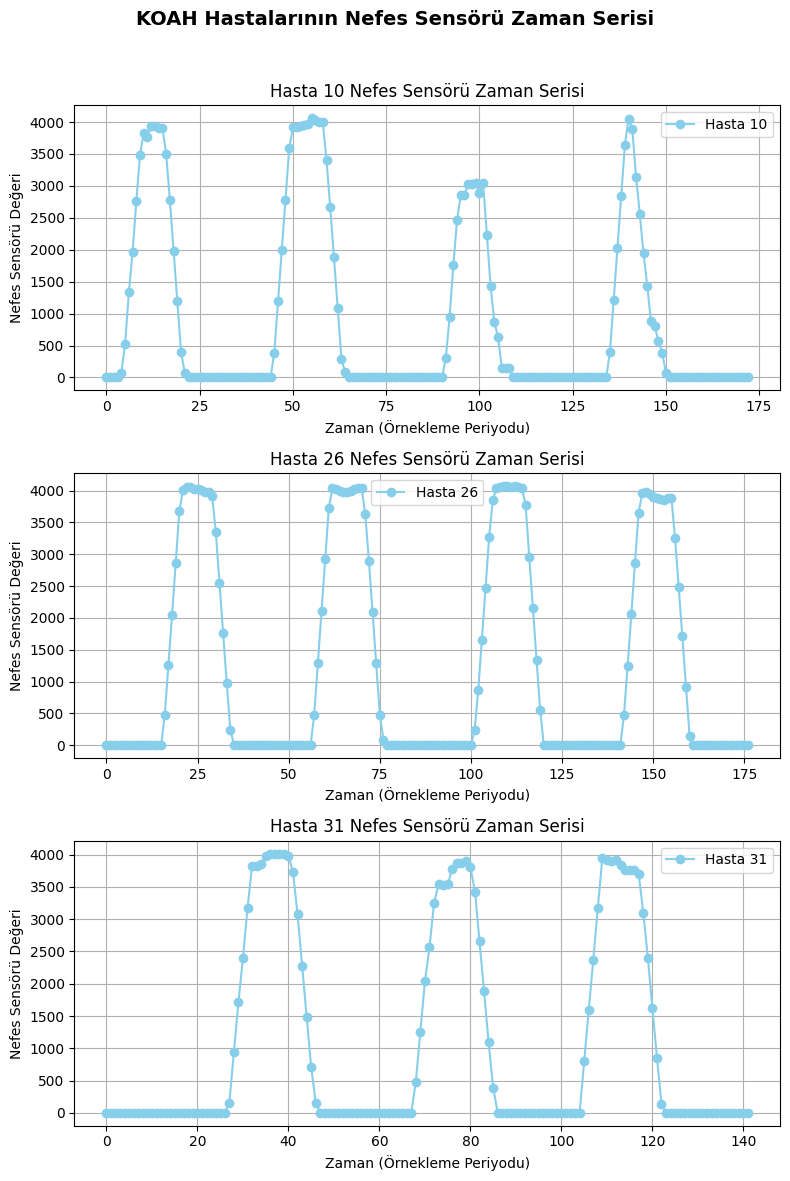

In [29]:
plot_time_series_for_patients(sample_healthy_patients, is_breath = True)

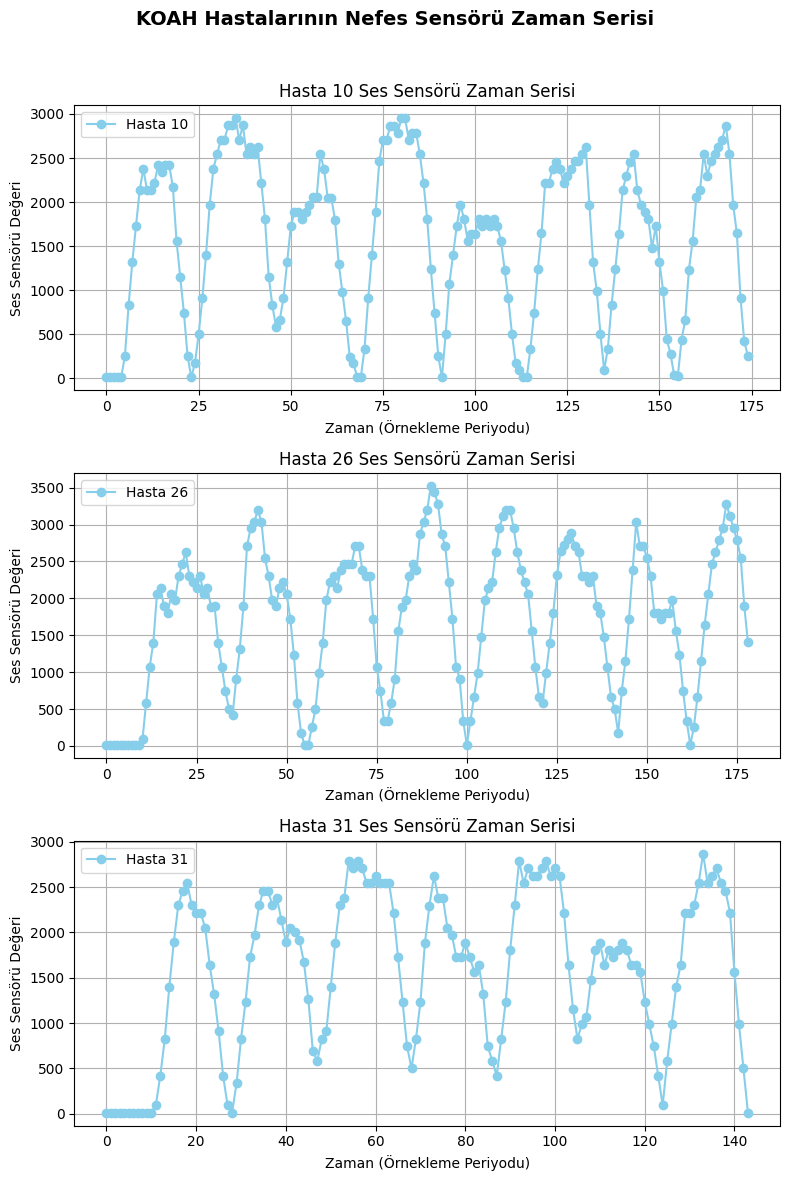

In [ ]:
plot_time_series_for_patients(sample_healthy_patients, is_breath = False)

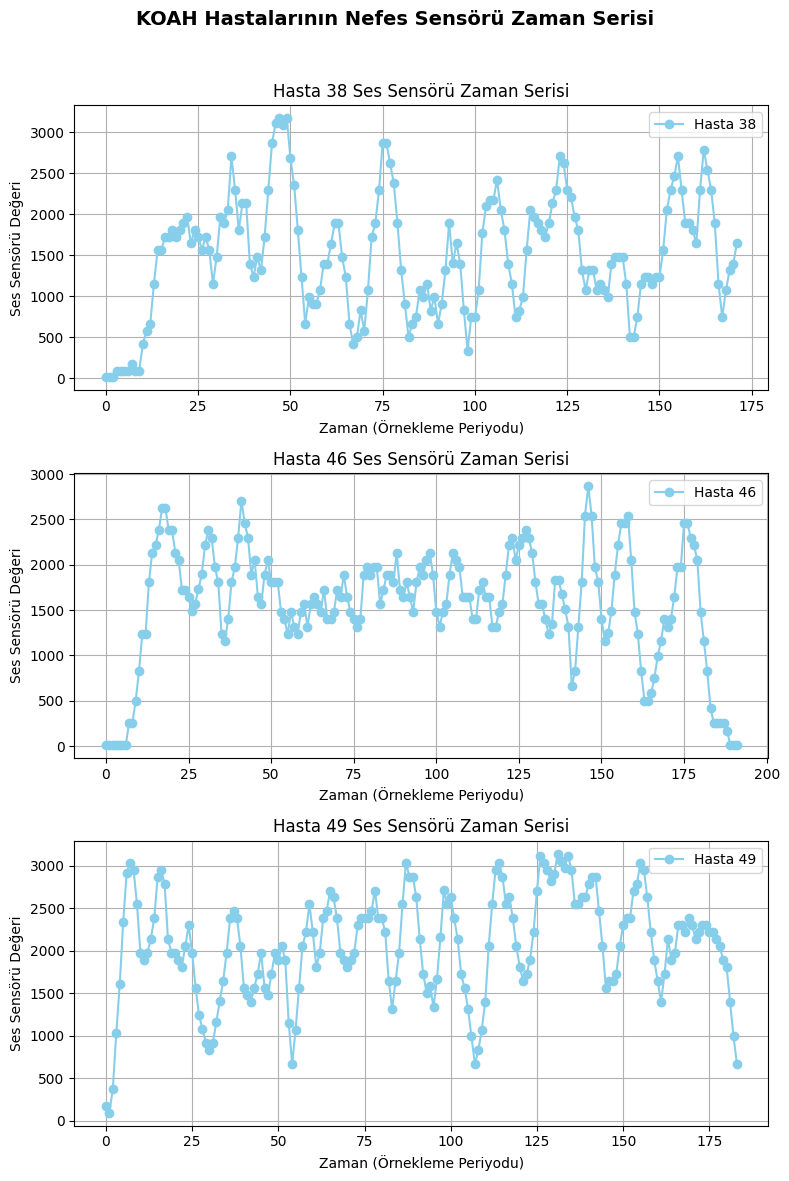

In [ ]:
plot_time_series_for_patients(sample_sick_patients, is_breath = False)

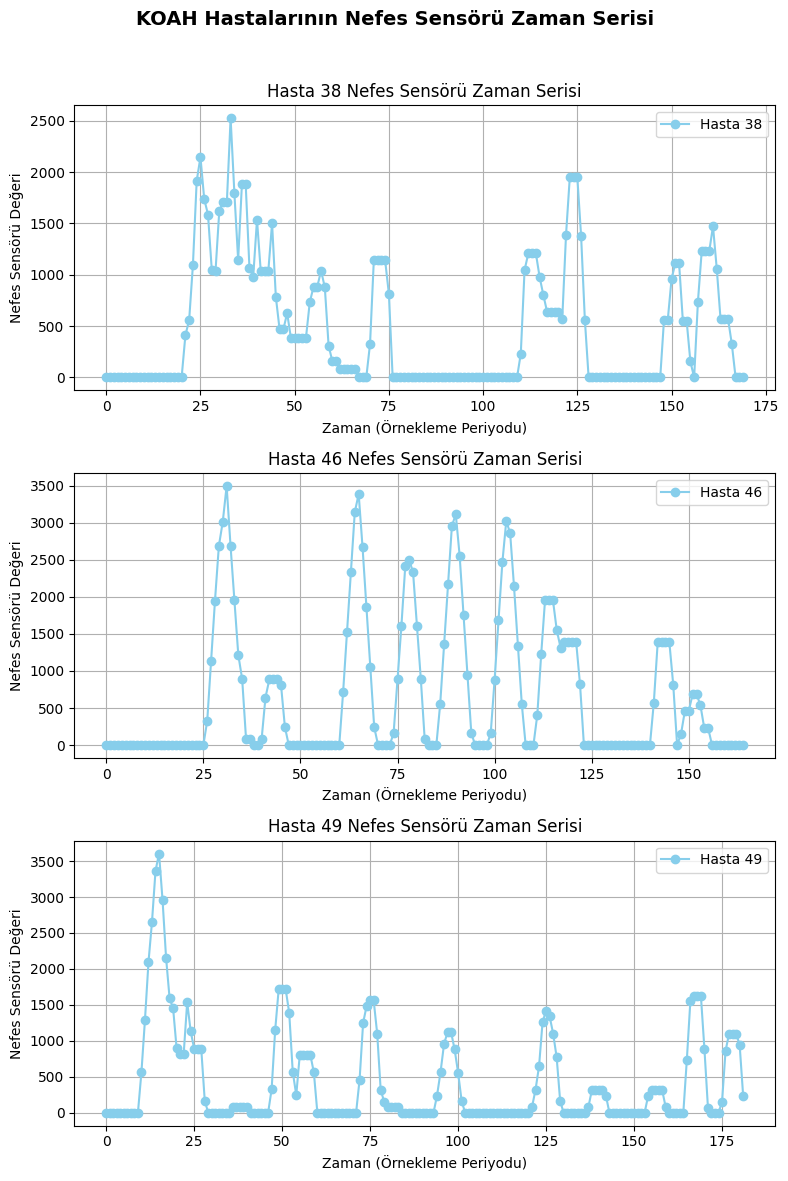

In [ ]:
plot_time_series_for_patients(sample_sick_patients,is_breath = True)

**TEMEL İSTATİKSEL ÖZELLİKLER**

mean_force: Sensör verisinin ortalama değeri. Hastanın solunum kuvvetinin genel seviyesini gösterir.

std_force: Kuvvet verisinin standart sapması. Solunum kuvvetindeki dalgalanmaları ifade eder. Daha büyük değerler, düzensiz bir solunum modeline işaret edebilir.

min_force: Solunum kuvvetinin en düşük değeri. KOAH hastalarında minimum kuvvet, solunum zayıflığını gösterebilir.

max_force: Solunum kuvvetinin en yüksek değeri. Zirve kuvvet, hastanın ne kadar güçlü nefes alabildiğini belirler.

skewness: Kuvvet dağılımının simetrisizliğini gösterir. Asimetrik solunum desenleri KOAH hastalarında görülebilir.

kurtosis: Kuvvet dağılımının sivriliğini ölçer. Anormal zirve noktaları olup olmadığını analiz etmek için kullanılır.

**NEFES DALGASI ÖZELLİKLERİ**

num_peaks: Nefes alma sırasında meydana gelen zirve sayısı. KOAH hastalarında düzensiz zirveler olabilir.

num_troughs: Nefes verme sırasında meydana gelen çukur sayısı. Daha fazla çukur, nefes verme zorluğuna işaret edebilir.

avg_peak_height: Ortalama nefes alma zirvesi. Hastanın soluk alırken ulaştığı maksimum kuvveti gösterir.

avg_trough_depth: Ortalama nefes verme derinliği. Hastanın ne kadar kuvvetli nefes verebildiğini gösterir.

breath_amplitude: Ortalama nefes alma ve verme farkı. Düşük değerler, KOAH hastalarında yetersiz hava değişimini gösterebilir.

peak_variability: Zirve yüksekliklerinin değişkenliği. Daha düzensiz zirveler, solunum bozukluklarını gösterebilir.

trough_variability: Çukur seviyelerinin değişkenliği. Düzensiz nefes verme paterni KOAH hastalarında sık görülür.

max_cluster: En uzun süreyle aynı maksimum değerde kalan bölge. Nefes alırken veya verirken sabit kalma eğilimi varsa, KOAH hastaları için patolojik olabilir.

**KOAH İÇİN KRITİK METRİKLER**

fev1_fvc_ratio: Zorla ekspiratuar hacim (FEV1) / Zorla vital kapasite (FVC) oranı. KOAH teşhisi için en kritik ölçümlerden biridir. Değer %70'in altındaysa KOAH riski yüksektir.

pef (Peak Expiratory Flow): Zirve nefes verme hızı. KOAH hastalarında genellikle düşüktür.

breath_duration: Bir nefes döngüsünün süresi. KOAH hastalarında nefes alma süresi genellikle uzar.

slope: Solunum gücünün zaman içindeki değişimi. Nefes verme sürecindeki eğim değişiklikleri hastalığın şiddetini gösterebilir.

In [42]:
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis, entropy
from itertools import groupby
from scipy.fft import fft
from python_speech_features import mfcc

def extract_all_features(patient_age, patient_smoking, sensor_data, audio_signal, timestamps=None, max_val=4095):
    """KOAH hastalığı tespiti için nefes verisinden özellikler çıkarır"""

    # Sensör verisini NumPy array'e çevir
    sensor_data = np.array(sensor_data)
    audio_signal = np.array(audio_signal)

    # Eğer zaman verisi sağlanmadıysa, indeks numarasını zaman olarak kabul et
    if timestamps is None:
        timestamps = np.arange(len(sensor_data))
    else:
        timestamps = np.array(timestamps)

    # Zirve (peak) ve çukur (trough) noktalarını bul
    peaks, _ = find_peaks(sensor_data, height=max_val * 0.8, distance=10)
    troughs, _ = find_peaks(max_val - sensor_data, height=max_val * 0.8, distance=10)

    peak_values = sensor_data[peaks] if len(peaks) > 0 else [0]
    trough_values = sensor_data[troughs] if len(troughs) > 0 else [0]

    # FEV1/FVC oranı (KOAH teşhisinde kullanılan en önemli metriklerden biri)
    fev1 = np.percentile(sensor_data, 75)  # Yaklaşık ilk %75'lik değer
    fvc = np.sum(sensor_data)  # Toplam nefes kapasitesi (yaklaşık hesaplama)
    fev1_fvc_ratio = fev1 / fvc if fvc != 0 else 0

    # PEF (Peak Expiratory Flow) - Zirve nefes verme hızı
    pef = np.max(sensor_data)

    # Solunum süresi
    breath_duration = timestamps[-1] - timestamps[0] if len(timestamps) > 1 else 0

    # Eğilim (Trend) hesaplama
    slope = np.polyfit(timestamps, sensor_data, 1)[0] if len(sensor_data) > 1 else 0

    # Frekans alanı analizi (Fourier Transform)
    fft_coeffs = np.abs(fft(sensor_data))[:10]  # İlk 10 bileşeni al

      # FFT hesapla
    fft_coeffs = np.abs(fft(audio_signal))[:len(audio_signal)//2]
    fft_probs = fft_coeffs / np.sum(fft_coeffs) if np.sum(fft_coeffs) > 0 else np.ones_like(fft_coeffs)


    features = {
        'patient_age': patient_age,
        'patient_smoking': patient_smoking,

        # Key statistical features for Breath
        'mean_force': np.mean(sensor_data),
        'std_force': np.std(sensor_data),
        'min_force': np.min(sensor_data),
        'max_force': np.max(sensor_data),
        'skewness': skew(sensor_data),
        'kurtosis': kurtosis(sensor_data),

        # Breath wave characteristics
        'num_peaks': len(peaks),
        'num_troughs': len(troughs),
        'avg_peak_height': np.mean(peak_values),
        'avg_trough_depth': np.mean(trough_values),
        'breath_amplitude': np.mean(peak_values) - np.mean(trough_values) if len(peaks) > 0 and len(troughs) > 0 else 0,
        'peak_variability': np.std(peak_values) if len(peaks) > 1 else 0,
        'trough_variability': np.std(trough_values) if len(troughs) > 1 else 0,
        'max_cluster': max(len(list(g)) for k, g in groupby(sensor_data == max_val)) if max_val in sensor_data else 0,

        # Critical features for COPD
        'fev1_fvc_ratio': fev1_fvc_ratio,  # KOAH teşhisi için kritik oran
        'pef': pef,  # Zirve nefes verme hızı
        'breath_duration': breath_duration,  # Nefes süresi
        'slope': slope,  # Nefes gücünün zaman içindeki değişim eğilimi

        # Frequency domain characteristics
        'fft_coeff_1': fft_coeffs[0] if len(fft_coeffs) > 0 else 0,
        'fft_coeff_2': fft_coeffs[1] if len(fft_coeffs) > 1 else 0,
        'fft_coeff_3': fft_coeffs[2] if len(fft_coeffs) > 2 else 0,
        'fft_coeff_4': fft_coeffs[3] if len(fft_coeffs) > 3 else 0,
        'fft_coeff_5': fft_coeffs[4] if len(fft_coeffs) > 4 else 0,

        # Basic statistical features for audio
        'mean_audio': np.mean(audio_signal),
        'std_audio': np.std(audio_signal),
        'max_audio': np.max(audio_signal),
        'min_audio': np.min(audio_signal),

        # Ses için belirli özellikler
        'signal_energy': np.sum(audio_signal**2),
        'rms_energy': np.sqrt(np.mean(audio_signal**2)),
        'zero_crossing_rate': np.mean(np.abs(np.diff(np.sign(audio_signal)))),
        'fft_peak_freq': np.argmax(fft_coeffs),
        'fft_bandwidth': np.std(fft_coeffs),
        'fft_entropy': entropy(fft_probs) if np.all(fft_probs > 0) else 0,
    }

    # MFCC özellikleri (numcep=13 default)
    try:
        mfcc_features = mfcc(audio_signal.astype(np.float32), samplerate=16000, numcep=13)
        mfcc_mean = np.mean(mfcc_features, axis=0)
        for i, val in enumerate(mfcc_mean):
            features[f'mfcc_{i+1}'] = val
    except:
        for i in range(13):
            features[f'mfcc_{i+1}'] = 0

    return features


In [43]:
pd.set_option("display.max_columns", None)

In [44]:
# Özellik çıkarma fonksiyonunu kullanarak her bir hasta için verileri işleme
patient_features = []

for patient in patient_list:
    # Breathing sensor verisi (column1.txt) kullanarak özellikleri çıkar
    features = extract_all_features(patient.age, patient.is_smoking, patient.breath_sensor,patient.audio_sensor, timestamps=None, max_val=4095)

    # Özellikleri hasta bilgisiyle birleştir
    patient_data = {
        #'id': patient.id,
        #'name': patient.name,
        #'surname': patient.surname,
        #'test_date': patient.test_date,
        'is_sick': patient.is_sick,
    }

    # Özellikleri hasta verilerine ekle
    patient_data.update(features)

    # Özellikleri listeye ekle
    patient_features.append(patient_data)

# Özellikleri DataFrame'e çevir
df = pd.DataFrame(patient_features)

In [45]:
df

,is_sick,patient_age,patient_smoking,mean_force,std_force,min_force,max_force,skewness,kurtosis,num_peaks,num_troughs,avg_peak_height,avg_trough_depth,breath_amplitude,peak_variability,trough_variability,max_cluster,fev1_fvc_ratio,pef,breath_duration,slope,fft_coeff_1,fft_coeff_2,fft_coeff_3,fft_coeff_4,fft_coeff_5,mean_audio,std_audio,max_audio,min_audio,signal_energy,rms_energy,zero_crossing_rate,fft_peak_freq,fft_bandwidth,fft_entropy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,0,21,0,936.515924,1295.938190,0.0,4069.4,1.083799,-0.205817,2,3,4015.000000,0.0,4015.000000,54.400000,0.0,0,0.013578,4069.4,156,1.801047,235891.6,49950.984140,47923.168046,38637.137008,11865.121315,1483.594969,1010.329936,3522.8,9.8,5.122695e+08,1794.943066,0.0,0,28154.232415,2.733054,15.822310,5.532315,-11.486892,-21.494972,8.457136,12.215337,-8.836780,21.764902,9.840459,-24.550266,10.641206,-19.996643,17.693053
1,0,21,0,1033.092105,1594.275354,0.0,4089.6,1.101141,-0.576962,3,2,4069.866667,0.0,4069.866667,15.476721,0.0,0,0.014090,4089.6,151,-1.498872,225443.4,29721.340490,42147.859246,27197.806499,32613.944080,1463.918182,966.601776,3278.0,10.2,4.739158e+08,1754.244976,0.0,0,27204.799481,2.669397,15.887359,2.923080,-7.189024,-19.151305,1.404343,13.323378,-22.247133,35.510230,17.717015,-20.886734,-7.353396,-5.109495,19.088319
2,0,21,0,1314.980645,1693.765770,0.0,4094.2,0.738935,-1.241014,4,3,4088.600000,0.0,4088.600000,4.501111,0.0,0,0.014916,4094.2,154,-6.665989,265280.4,35452.469743,26642.375950,25868.621618,15593.501803,1689.684076,891.201257,3033.0,10.0,5.729357e+08,1910.306771,0.0,0,30822.860139,2.712255,15.850564,1.490547,-8.853509,-18.434263,2.204038,17.445469,-11.891471,34.074992,15.933297,-24.052843,-3.236395,-4.671504,11.760800
3,0,21,0,1260.628378,1670.312543,0.0,4092.2,0.803585,-1.124446,4,3,4081.750000,0.0,4081.750000,10.518912,0.0,0,0.015219,4092.2,147,1.247321,233913.2,42299.787586,36597.918027,28993.709991,7947.573865,1559.421333,982.261658,3114.2,10.4,5.094949e+08,1842.995621,0.0,0,28310.613551,2.688636,15.847901,1.900791,-11.888907,-17.832034,4.137379,12.315868,-4.850312,33.985158,16.640826,-16.592096,-5.334603,-19.239307,11.959212
4,0,21,0,1054.144737,1612.483980,0.0,4091.8,1.069004,-0.657532,3,2,4063.266667,0.0,4063.266667,31.608578,0.0,0,0.013919,4091.8,151,0.477740,262644.2,38322.647440,33973.180274,27949.851894,41469.078182,1705.481818,1011.895380,3278.0,10.2,6.056205e+08,1983.078539,0.0,0,31304.382297,2.537123,15.829479,4.834762,-7.591910,-16.591588,-1.664011,6.145916,-13.571583,25.775584,21.116506,-16.428362,5.470921,-20.627721,23.399285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,21,0,1013.366667,1327.264830,0.0,4075.6,1.208016,0.190178,2,4,4072.900000,0.0,4072.900000,2.700000,0.0,0,0.015502,4075.6,101,-13.660576,157360.6,16404.222811,7704.367106,10295.812691,11903.964882,1513.082692,689.596417,3115.8,15.4,2.875561e+08,1662.817625,0.0,0,21804.471817,2.498298,15.850090,-7.917609,-13.408687,-10.458566,2.702889,6.716123,0.925670,22.608284,7.500002,-8.676700,7.904734,9.610833,3.785541
95,1,21,0,900.890566,1413.910980,0.0,4046.2,1.229271,-0.132629,4,4,3922.000000,0.0,3922.000000,72.951765,0.0,0,0.011839,4046.2,158,-4.283341,192014.4,7244.884570,5633.770227,11179.276131,2892.636338,1192.636025,738.042843,2462.8,15.0,3.167012e+08,1402.529118,0.0,0,22449.608588,2.918280,16.058945,-7.769185,-11.602311,-18.643145,-3.823561,17.001760,12.773355,14.819845,-1.675932,-12.412235,0.670657,4.227263,18.526356
96,1,21,0,823.430000,1296.752529,0.0,3991.4,1.258216,-0.008562,3,2,3754.533333,0.0,3754.533333,241.981505,0.0,0,0.019134,3991.4,99,-10.249691,120742.6,1718.909387,7156.765671,6656.170411,8847.104880,1183.750980,764.163340,2586.6,15.6,2.024916e+08,1408.975512,0.0,0,17709.019777,2.340148,15.387869,0.433049,-10.994611,-26.546735,-0

In [33]:
labels = []

for patient in patient_list:
    labels.append(patient.is_sick)

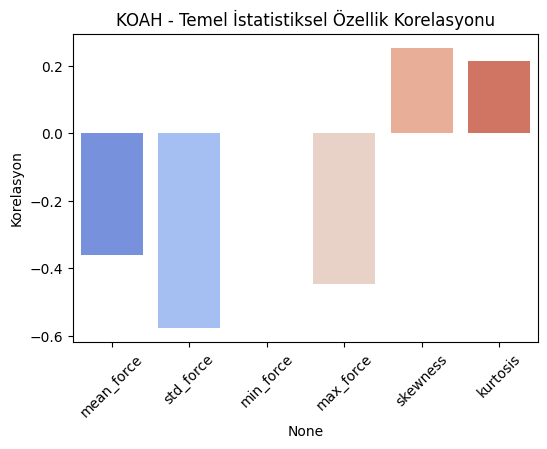

In [34]:
# Temel istatistiksel özellikler
basic_stats = df[['mean_force', 'std_force', 'min_force', 'max_force', 'skewness', 'kurtosis']].copy()
basic_stats['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_basic = basic_stats.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir;
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_basic.index, y=corr_basic.values, palette='coolwarm', hue=corr_basic.index)
plt.xticks(rotation=45)
plt.title("KOAH - Temel İstatistiksel Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

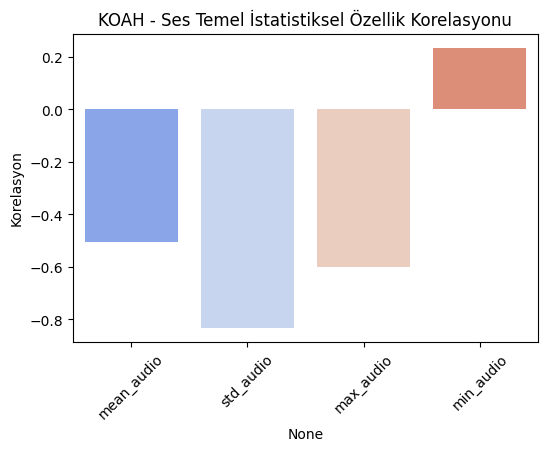

In [35]:
# Temel istatistiksel özellikler
basic_stats = df[['mean_audio','std_audio','max_audio','min_audio']].copy()
basic_stats['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_basic = basic_stats.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir;
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_basic.index, y=corr_basic.values, palette='coolwarm', hue=corr_basic.index)
plt.xticks(rotation=45)
plt.title("KOAH - Ses Temel İstatistiksel Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

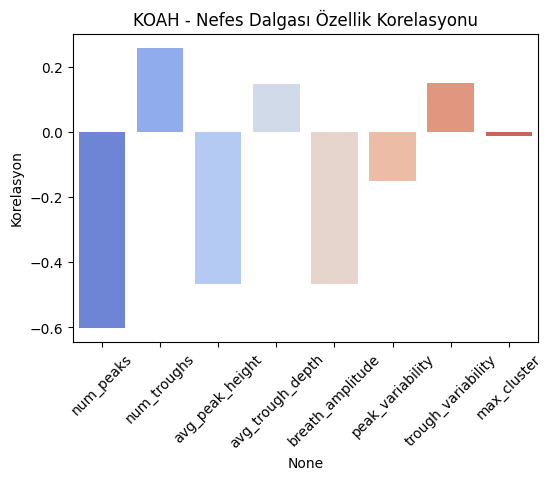

In [36]:
# Nefes dalgasına özel özellikler
breath_features = df[['num_peaks', 'num_troughs', 'avg_peak_height','avg_trough_depth','breath_amplitude','peak_variability','trough_variability','max_cluster']].copy()
breath_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_breath = breath_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_breath.index, y=corr_breath.values, palette='coolwarm', hue=corr_breath.index)
plt.xticks(rotation=45)
plt.title("KOAH - Nefes Dalgası Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

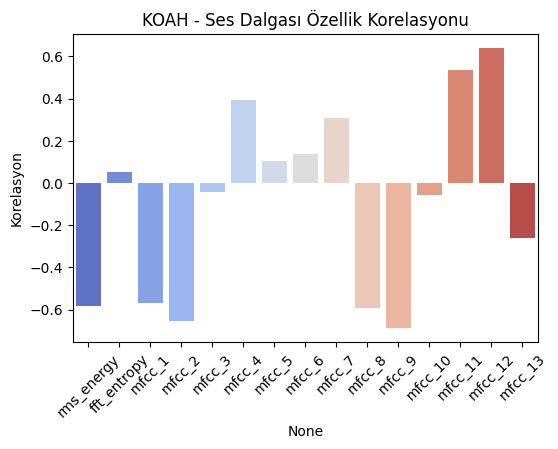

In [37]:
# Ses dalgasına özel özellikler
breath_features = df[['rms_energy','fft_entropy','mfcc_1'	,'mfcc_2'	,'mfcc_3',	'mfcc_4',	'mfcc_5',	'mfcc_6',	'mfcc_7',	'mfcc_8',	'mfcc_9',	'mfcc_10',	'mfcc_11'	, 'mfcc_12'	,'mfcc_13']].copy()
breath_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_breath = breath_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_breath.index, y=corr_breath.values, palette='coolwarm', hue=corr_breath.index)
plt.xticks(rotation=45)
plt.title("KOAH - Ses Dalgası Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

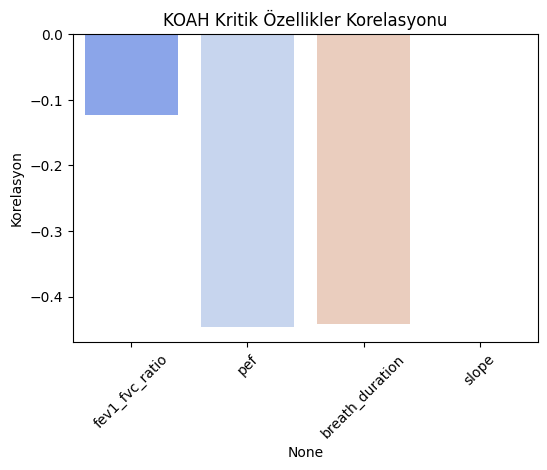

In [38]:
# KOAH için kritik özellikler
freq_features = df[['fev1_fvc_ratio', 'pef', 'breath_duration', 'slope']].copy()
freq_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_freq = freq_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_freq.index, y=corr_freq.values, palette='coolwarm', hue=corr_freq.index)
plt.xticks(rotation=45)
plt.title("KOAH Kritik Özellikler Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

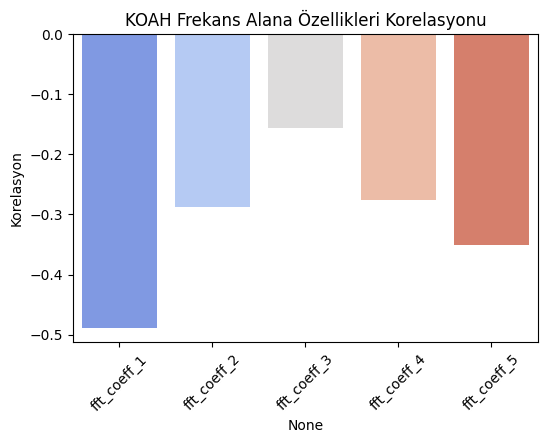

In [39]:
# KOAH için frekans alanı özellikler
freq_features = df[['fft_coeff_1', 'fft_coeff_2', 'fft_coeff_3', 'fft_coeff_4', 'fft_coeff_5']].copy()
freq_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_freq = freq_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_freq.index, y=corr_freq.values, palette='coolwarm', hue=corr_freq.index)
plt.xticks(rotation=45)
plt.title("KOAH Frekans Alana Özellikleri Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

In [46]:
X = df.drop(columns=['is_sick'])  # 'is_sick' dışındaki tüm sütunlar
y = df['is_sick']  # 'is_sick' hedef değişkeni

In [51]:
X

,patient_age,patient_smoking,mean_force,std_force,min_force,max_force,skewness,kurtosis,num_peaks,num_troughs,avg_peak_height,avg_trough_depth,breath_amplitude,peak_variability,trough_variability,max_cluster,fev1_fvc_ratio,pef,breath_duration,slope,fft_coeff_1,fft_coeff_2,fft_coeff_3,fft_coeff_4,fft_coeff_5,mean_audio,std_audio,max_audio,min_audio,signal_energy,rms_energy,zero_crossing_rate,fft_peak_freq,fft_bandwidth,fft_entropy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,21,0,936.515924,1295.938190,0.0,4069.4,1.083799,-0.205817,2,3,4015.000000,0.0,4015.000000,54.400000,0.0,0,0.013578,4069.4,156,1.801047,235891.6,49950.984140,47923.168046,38637.137008,11865.121315,1483.594969,1010.329936,3522.8,9.8,5.122695e+08,1794.943066,0.0,0,28154.232415,2.733054,15.822310,5.532315,-11.486892,-21.494972,8.457136,12.215337,-8.836780,21.764902,9.840459,-24.550266,10.641206,-19.996643,17.693053
1,21,0,1033.092105,1594.275354,0.0,4089.6,1.101141,-0.576962,3,2,4069.866667,0.0,4069.866667,15.476721,0.0,0,0.014090,4089.6,151,-1.498872,225443.4,29721.340490,42147.859246,27197.806499,32613.944080,1463.918182,966.601776,3278.0,10.2,4.739158e+08,1754.244976,0.0,0,27204.799481,2.669397,15.887359,2.923080,-7.189024,-19.151305,1.404343,13.323378,-22.247133,35.510230,17.717015,-20.886734,-7.353396,-5.109495,19.088319
2,21,0,1314.980645,1693.765770,0.0,4094.2,0.738935,-1.241014,4,3,4088.600000,0.0,4088.600000,4.501111,0.0,0,0.014916,4094.2,154,-6.665989,265280.4,35452.469743,26642.375950,25868.621618,15593.501803,1689.684076,891.201257,3033.0,10.0,5.729357e+08,1910.306771,0.0,0,30822.860139,2.712255,15.850564,1.490547,-8.853509,-18.434263,2.204038,17.445469,-11.891471,34.074992,15.933297,-24.052843,-3.236395,-4.671504,11.760800
3,21,0,1260.628378,1670.312543,0.0,4092.2,0.803585,-1.124446,4,3,4081.750000,0.0,4081.750000,10.518912,0.0,0,0.015219,4092.2,147,1.247321,233913.2,42299.787586,36597.918027,28993.709991,7947.573865,1559.421333,982.261658,3114.2,10.4,5.094949e+08,1842.995621,0.0,0,28310.613551,2.688636,15.847901,1.900791,-11.888907,-17.832034,4.137379,12.315868,-4.850312,33.985158,16.640826,-16.592096,-5.334603,-19.239307,11.959212
4,21,0,1054.144737,1612.483980,0.0,4091.8,1.069004,-0.657532,3,2,4063.266667,0.0,4063.266667,31.608578,0.0,0,0.013919,4091.8,151,0.477740,262644.2,38322.647440,33973.180274,27949.851894,41469.078182,1705.481818,1011.895380,3278.0,10.2,6.056205e+08,1983.078539,0.0,0,31304.382297,2.537123,15.829479,4.834762,-7.591910,-16.591588,-1.664011,6.145916,-13.571583,25.775584,21.116506,-16.428362,5.470921,-20.627721,23.399285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,21,0,1013.366667,1327.264830,0.0,4075.6,1.208016,0.190178,2,4,4072.900000,0.0,4072.900000,2.700000,0.0,0,0.015502,4075.6,101,-13.660576,157360.6,16404.222811,7704.367106,10295.812691,11903.964882,1513.082692,689.596417,3115.8,15.4,2.875561e+08,1662.817625,0.0,0,21804.471817,2.498298,15.850090,-7.917609,-13.408687,-10.458566,2.702889,6.716123,0.925670,22.608284,7.500002,-8.676700,7.904734,9.610833,3.785541
95,21,0,900.890566,1413.910980,0.0,4046.2,1.229271,-0.132629,4,4,3922.000000,0.0,3922.000000,72.951765,0.0,0,0.011839,4046.2,158,-4.283341,192014.4,7244.884570,5633.770227,11179.276131,2892.636338,1192.636025,738.042843,2462.8,15.0,3.167012e+08,1402.529118,0.0,0,22449.608588,2.918280,16.058945,-7.769185,-11.602311,-18.643145,-3.823561,17.001760,12.773355,14.819845,-1.675932,-12.412235,0.670657,4.227263,18.526356
96,21,0,823.430000,1296.752529,0.0,3991.4,1.258216,-0.008562,3,2,3754.533333,0.0,3754.533333,241.981505,0.0,0,0.019134,3991.4,99,-10.249691,120742.6,1718.909387,7156.765671,6656.170411,8847.104880,1183.750980,764.163340,2586.6,15.6,2.024916e+08,1408.975512,0.0,0,17709.019777,2.340148,15.387869,0.433049,-10.994611,-26.546735,-0.626284,13.173066,14.381871,

In [52]:
y

,is_sick
0,0
1,0
2,0
3,0
4,0
...,...
94,1
95,1
96,1
97,1


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# İlk eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Eğitim/validation ayrımı
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Etiketleri int tipine dönüştür (XGBoost uyumu için gerekli)
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

# Veri boyutlarını yazdır
print(f"Train seti boyutu: {X_train.shape}")
print(f"Validation seti boyutu: {X_val.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Train seti boyutu: (63, 48)
Validation seti boyutu: (16, 48)
Test seti boyutu: (20, 48)


In [77]:
# Model ve parametreler
models_with_params = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42),
        'params': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__solver': ['lbfgs', 'liblinear']
        }
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5]
        }
    },
    {
        'name': 'XGBoost',
        'model': xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    {
        'name': 'SVM',
        'model': SVC(decision_function_shape='ovr', random_state=42),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'MLP',
        'model': MLPClassifier(max_iter=1000, random_state=42),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'model__activation': ['relu', 'tanh'],
            'model__alpha': [0.0001, 0.001]
        }
    }
]

best_models = []

In [78]:
for item in models_with_params:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', item['model'])
    ])

    print(f"Searching best params for: {item['name']}...")
    gs = GridSearchCV(pipe, item['params'], cv=5, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)

    best_models.append({
        'name': item['name'],
        'best_params': gs.best_params_,
        'best_score': gs.best_score_,
        'test_accuracy': accuracy_score(y_test, gs.predict(X_test))
    })

# Sonuçları yazdır
for bm in best_models:
    print(f"\nModel: {bm['name']}")
    print(f"Best CV Score: {bm['best_score']:.4f}")
    print(f"Best Params: {bm['best_params']}")
    print(f"Test Accuracy: {bm['test_accuracy']:.4f}")

Searching best params for: Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Searching best params for: KNN...
Searching best params for: Random Forest...
Searching best params for: XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:39:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Searching best params for: SVM...
Searching best params for: MLP...

Model: Logistic Regression
Best CV Score: 0.8885
Best Params: {'model__C': 1, 'model__solver': 'lbfgs'}
Test Accuracy: 0.8000

Model: KNN
Best CV Score: 0.9513
Best Params: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'uniform'}
Test Accuracy: 0.9500

Model: Random Forest
Best CV Score: 0.9231
Best Params: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Test Accuracy: 0.8500

Model: XGBoost
Best CV Score: 0.9051
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Test Accuracy: 0.8000

Model: SVM
Best CV Score: 0.8885
Best Params: {'model__C': 0.1, 'model__kernel': 'linear'}
Test Accuracy: 0.8000

Model: MLP
Best CV Score: 0.8897
Best Params: {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (50,)}
Test Accuracy: 0.9000


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

In [41]:
!cp -r "/content/recordings_filtered" "/content/drive/MyDrive/bitirmeProjesi/"

cp: cannot stat '/content/recordings_filtered': No such file or directory
